In [5]:
# initial setup ###
import numpy as np
from vizdoom import *
import random

def create_environment():
    game = DoomGame()
    game.load_config('vizdoom/myConfig.cfg')  
    game.set_doom_scenario_path('vizdoom/square.wad')
    #game.set_doom_scenario_path('vizdoom/tmaze.wad')
    #game.set_doom_map('map01')
    game.set_mode(Mode.PLAYER)
    game.set_window_visible(False)
    game.set_automap_buffer_enabled(True)
    game.set_automap_mode(WHOLE)
    game.set_available_buttons([MOVE_LEFT, MOVE_RIGHT, MOVE_FORWARD, MOVE_BACKWARD, TURN_RIGHT]) 
    #game.set_available_buttons([MOVE_FORWARD, MOVE_BACKWARD, TURN_RIGHT, TURN_LEFT]) 
    game.set_available_game_variables([POSITION_X, POSITION_Y, ANGLE, VELOCITY_X, VELOCITY_Y, CAMERA_FOV])
    game.init()     
    return game

### plotting utilities ###
import matplotlib.pyplot as plt
from scipy import stats
import cv2

def plot_traj(traj, env_range=[(-200, 200), (-200, 200)]):
    #print((np.min(traj[:, 0]), np.max(traj[:, 0])));
    #print((np.max(traj[:, 1]), np.min(traj[:, 1])));
    plt.figure();
    plt.subplot(1, 1, 1);
    plt.plot(traj[:, 0], traj[:, 1], 'ko-');
    plt.xlim(env_range[0]);
    plt.ylim(env_range[1]);
    #plt.axis('off');
    plt.title('Trajectory');
    plt.show();
    

268.593750063
177.187500041
89.2968750208
0.0
268.593750063
177.187500041
89.2968750208
0.0
268.593750063
177.187500041
89.2968750208
0.0
268.593750063
177.187500041
89.2968750208
0.0
268.593750063
177.187500041
89.2968750208
0.0
268.593750063
177.187500041
89.2968750208
0.0
268.593750063
177.187500041
89.2968750208
0.0
268.593750063
177.187500041
89.2968750208
0.0
268.593750063
177.187500041
89.2968750208
0.0
268.593750063
177.187500041
89.2968750208
0.0


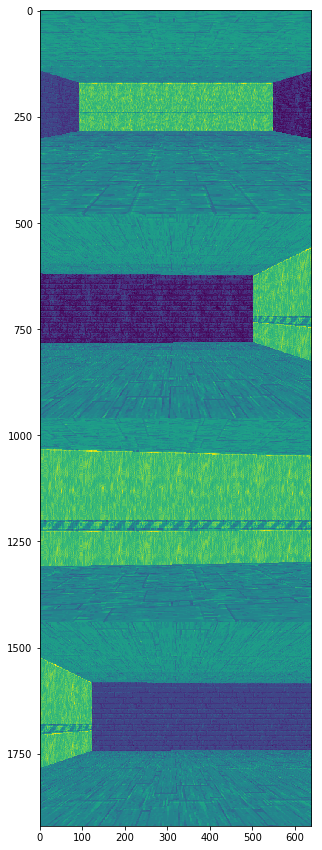

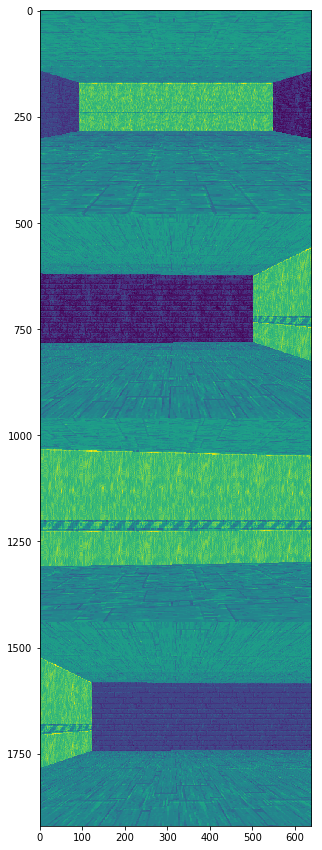

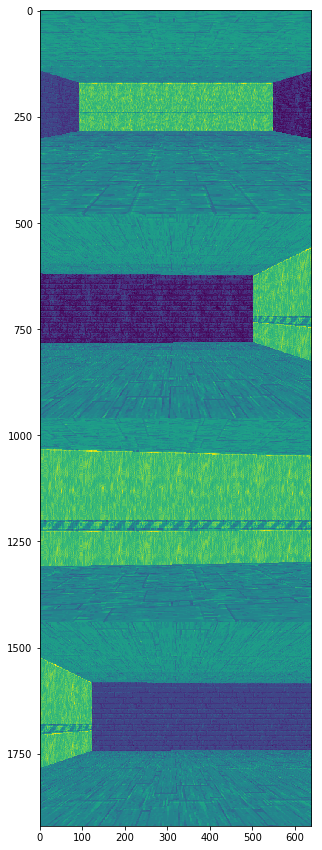

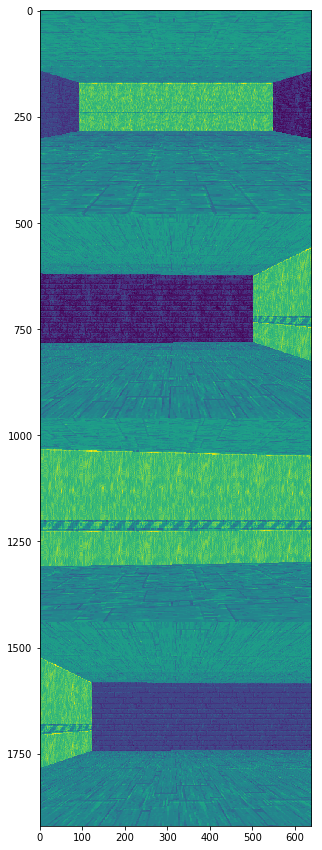

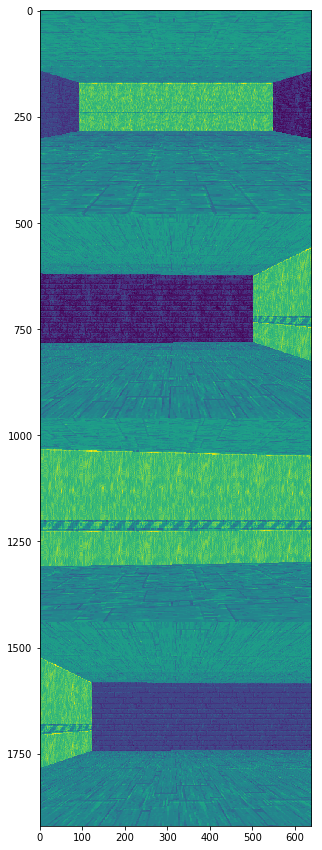

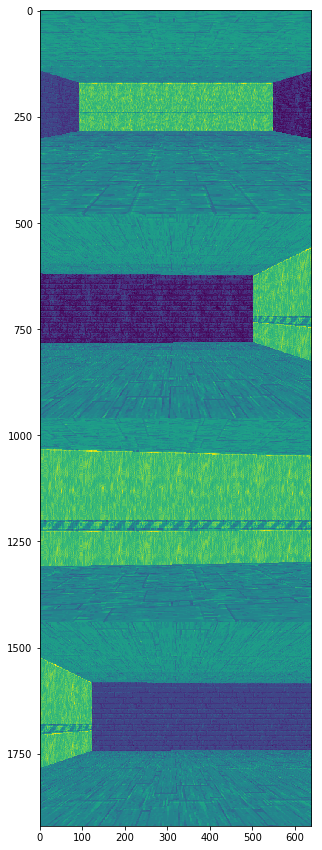

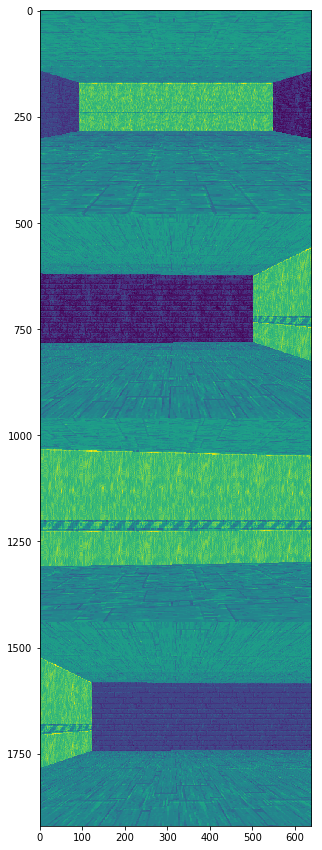

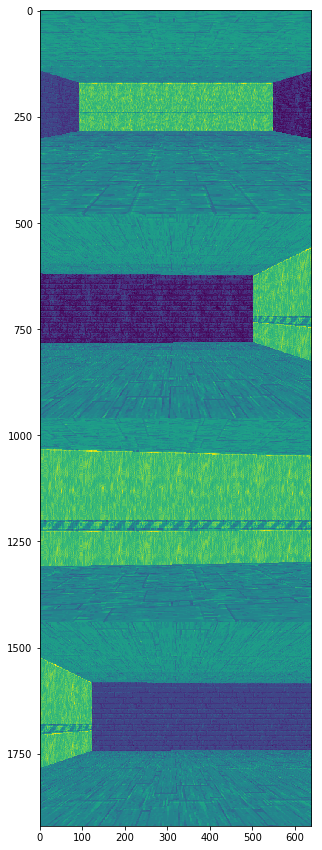

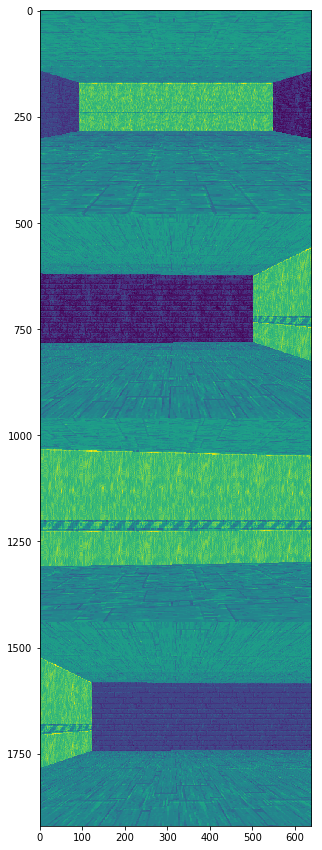

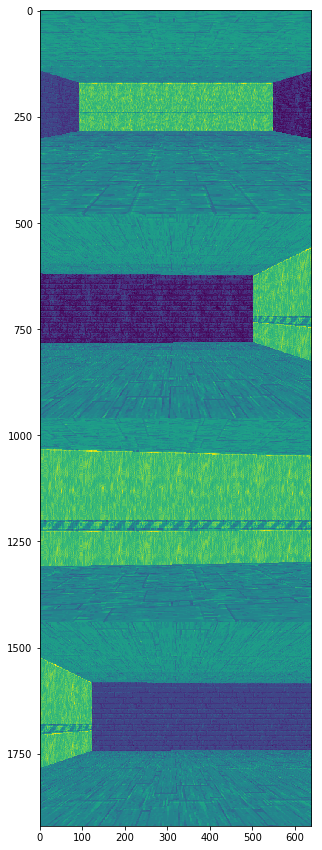

In [75]:
import cv2
import math
    
def turn90(game):
    deg = round((game.get_game_variable(ANGLE) - 90)/90)*90
    if deg < 0:
        deg += 360
        game.make_action([0, 0, 0, 0, 1], 10)
    while game.get_game_variable(ANGLE) > deg:
        game.make_action([0, 0, 0, 0, 1], int(math.ceil((game.get_game_variable(ANGLE) - deg)/10)))
    print(game.get_game_variable(ANGLE))
        
def lookAround(game):
    vision = game.get_state().screen_buffer
    turn90(game)
    vision = np.concatenate((vision, game.get_state().screen_buffer))
    turn90(game)
    vision = np.concatenate((vision, game.get_state().screen_buffer))
    turn90(game)
    vision = np.concatenate((vision, game.get_state().screen_buffer))
    turn90(game)
    
    #cv2.imwrite('test.jpg', vision)
    plt.figure(figsize=[15,15])
    plt.imshow(vision)
    #plt.show()

game = create_environment()
game.new_episode()


for i in range(10):
    lookAround(game)
    #print(game.get_game_variable(ANGLE))

game.close()

In [17]:
import time
import scipy.io as sio
import sys
np.seterr(divide='ignore', invalid='ignore')

game = create_environment()
game.new_episode()

def p(game):
    print(game.get_game_variable(POSITION_X), game.get_game_variable(POSITION_Y), game.get_game_variable(VELOCITY_X), game.get_game_variable(VELOCITY_Y))

def check(game):
    ori = [game.get_game_variable(POSITION_X), game.get_game_variable(POSITION_Y), game.get_game_variable(VELOCITY_X), game.get_game_variable(VELOCITY_Y), game.get_game_variable(ANGLE)]
    game.make_action([0, 0, 0, 0, 0], 1)
    aft = [game.get_game_variable(POSITION_X), game.get_game_variable(POSITION_Y), game.get_game_variable(VELOCITY_X), game.get_game_variable(VELOCITY_Y), game.get_game_variable(ANGLE)]
    res = (ori==aft and aft[2]==0 and aft[3]==0)
    print(res)
    return res
           

game.make_action([1, 0, 0, 0, 0], 1) 
game.make_action([0, 0, 0, 0, 0], 10) # first is always useless

game.make_action([0, 0, 0, 0, 1], 1)

def test(t):
    print(t)
    #p(game)
    y1 = game.get_game_variable(VELOCITY_Y)
    game.make_action([1, 0, 0, 0, 0], t)
    #p(game) # time to record velocity
    v = game.get_game_variable(VELOCITY_Y)
    game.make_action([0, 0, 0, 0, 0], 50)
    #p(game) # time to record position
    y2 = game.get_game_variable(POSITION_Y)
    check(game)
    print(v)

    print(y2-y1, (y2-y1)/t/t)
    #if v!=0:
    #    print(y2-y1, v, (y2-y1)/v)
    #else:
    #    print(y2-y1, v, y2)

for i in range(8):
    test(i+1)

game.close()

1
True
0.679351806640625
7.434295654296875 7.434295654296875
2
True
1.295013427734375
22.832855224609375 5.708213806152344
3
True
1.8529510498046875
46.24778747558594 5.138643052842882
4
True
2.35858154296875
77.63235473632812 4.852022171020508
5
True
2.8168182373046875
117.0242919921875 4.6809716796875005
6
True
3.232086181640625
164.44580078125 4.567938910590278
7
True
3.608428955078125
219.8573455810547 4.486884603694993
8
True
0.0
233.97657775878906 3.655884027481079


In [ ]:
"""
move left: +y
    1: 7.43798828125
    2: 15.406234741210938
    3: 23.426406860351562
    4: 31.400222778320312
    5: 39.411163330078125

move right: -y
    1: 7.4407501220703125
    2: 15.409713745117188
    3: 23.430374145507812
    4: 31.405014038085938
    5: 39.416473388671875
    
move forward: +x
    1: 7.7480926513671875
    2: 16.105484008789062
    3: 24.402435302734375
    4: 32.76698303222656
    5: 41.11082458496094

move backward: -x
    1: 7.7505340576171875
    2: 16.109344482421875
    3: 24.40655517578125
    4: 32.771759033203125
    5: 41.11656188964844
"""